In [ ]:
import pandas as pd
import seabron as sns

In [23]:
sns.set_theme()

In [24]:
pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [25]:
datatable = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv")

C:\Users\fysta\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


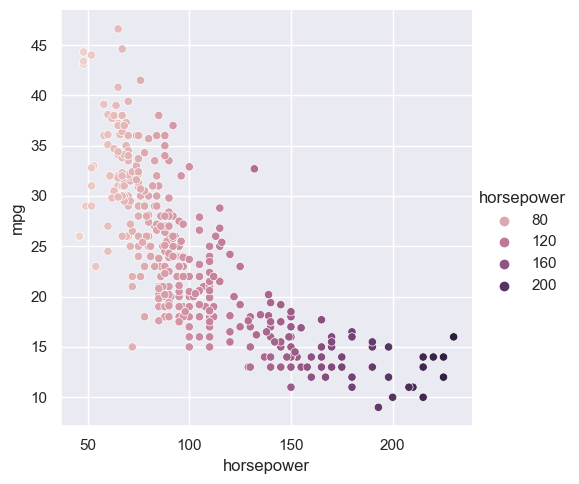

In [32]:
sns.relplot(
    data=datatable,
    x="horsepower", y="mpg",
    hue="horsepower")

### This graph shows that the lower the horsepower, the higher the feul economy (mph). It is interesting to note that there are some outliers in regards to both mph and horsepower.
### For example there values that show over 200 horsepower cars getting higher fuel economy than the mean of the other 200 horsepower fuel economy cars. Conversely, there are values that show below average fuel economy cars with much lower horsepower than other cars in this horsepower range. 

In [35]:
datatable.groupby(by="origin").mpg.sum().sort_values(ascending=False)

origin
usa       5000.8
japan     2405.6
europe    1952.4
Name: mpg, dtype: float64

In [122]:
countrympg = datatable.groupby(by="origin").mpg.sum().sort_values(ascending=False)

In [37]:
countrympg.to_frame().reset_index()

,origin,mpg
0,usa,5000.8
1,japan,2405.6
2,europe,1952.4


### The data in this table is quite intruiging. It shows that out of these 3 countries the USA boasts the highest sum of fuel economy (mpg).
### These results are not what I would have expected at all. USA is known for its big, gass-guzzling cars, that dont get much fuel economy. Whereas Europe and Japan are known for making cars with longlasting engines and great fuel economy. 
### This table is surprising to me as I did not expect to see these results! One theory that can explain why the results are as such is that there are more USA cars in the original dataset compared to Euro and Japanese cars.



C:\Users\fysta\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


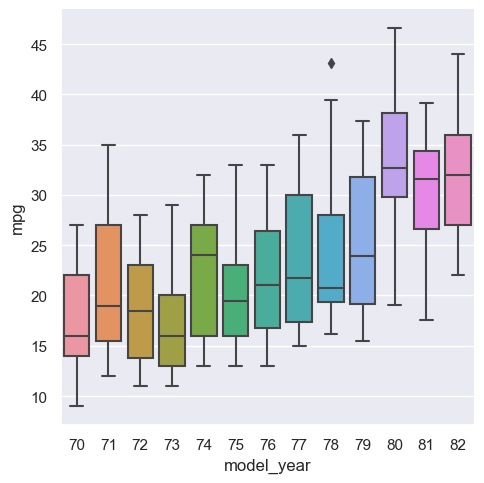

In [47]:
sns.catplot(data=datatable, x="model_year", y="mpg", kind="bar", errorbar=None)


### In this graph it is shown that generally the fuel economy has increased over time. 
### With that being said, the average values of fuel economy versus the entire set of data per year is not always increasing, and in most cases the median of the data is located towards the 25% percentile rather than the 50% or 75% percentile range. This indicates that the average increase in fuel economy is pretty low, especially during the time frames of 70-73 and 75-78. This decade was clearly not a good decade for increase in fuel economy. The early 80's years had a substantial increase in fuel economy. 

In [114]:
datatable.groupby(by="cylinders").mpg.mean().sort_values(ascending=False)

cylinders
4    29.286765
5    27.366667
3    20.550000
6    19.985714
8    14.963107
Name: mpg, dtype: float64

In [115]:
dtcyl = datatable.groupby(by="cylinders").mpg.mean().sort_values(ascending=False)

In [116]:
dtcyl.to_frame().reset_index()

,cylinders,mpg
0,4,29.286765
1,5,27.366667
2,3,20.550000
3,6,19.985714
4,8,14.963107


### The data shown in this graph would be data that I would expect to see. With more cylinders, more gas is needed in order to produce internal combustion on each cylinder. This creates a lower fuel economy for thise vehicles with higher cylinders. 
### It is interesting to note that there is almost double the fuel economy for the 4 cylinder @ 29.28 mpg compared to the 8 cylinder @ 14.96mpg.

C:\Users\fysta\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


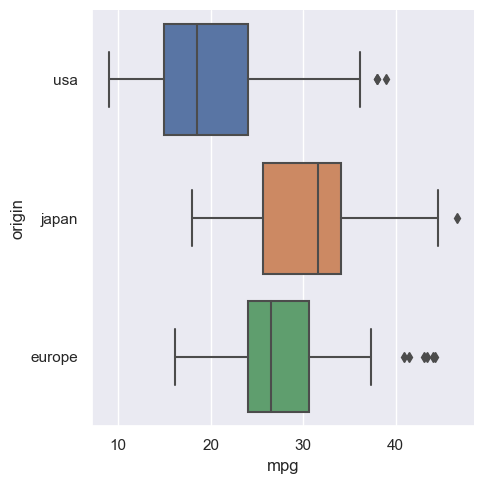

In [105]:
sns.catplot(data=datatable, x="mpg", y="origin", kind="box", errorbar=None)

### Compared to the table showing sum of fuel economy and country of origin, this graph shows what I would normally expect to see when comparing 3 countries and the fuel economy of thier cars. 
### This data shows that Japanese cars have the best fuel economy with a mean closer to the 75% percentile compared to USA and Euro cars which have a mean fuel economy closer to the 25-35% percentile of thier data sets. 
### It is interesting to note that, while Europe has the second highest fuel economy out of the the 3 countries, Europe has more outliers than both USA and Japan combined. 